In [ ]:
# Data manipulation and numerical computations
# For data loading, cleaning, and analysis
import pandas as pd
 # For numerical operations and array handling
import numpy as np

# Data visualisation
# For creating plots and visualisations
import matplotlib.pyplot as plt
# For statistical data visualisation
import seaborn as sns

# Text processing and utilities
# Regular expressions, string operations, and OS utilities
import re, string, os
# For counting word frequencies
from collections import Counter

# Warning handling
# To suppress or control warning messages
import warnings

# Date and time handling
# For flexible date parsing and manipulation
import dateutil

In [ ]:
# Define the path to the dataset file
file_path = "Amazon_Reviews.csv"

# Attempt to read the CSV file using UTF-8 encoding
# The 'python' engine and 'sep=None' allow pandas to automatically detect delimiters
# 'on_bad_lines=skip' ensures that corrupted or malformed rows do not stop execution
try:
    df = pd.read_csv(
        file_path,
        engine='python',
        sep=None,
        on_bad_lines='skip',
        encoding='utf-8'
    )

# If UTF-8 decoding fails, fall back to latin1 encoding
# This is common in real-world text datasets with mixed or inconsistent encodings
except Exception as e:
    print("UTF-8 read failed, trying latin1...", e)
    df = pd.read_csv(
        file_path,
        engine='python',
        sep=None,
        on_bad_lines='skip',
        encoding='latin1'
    )


In [ ]:
# Displaying number of rows and columns
df.shape

(21214, 9)

In [ ]:
# Displaying first 5 rows
df.head(5)

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


In [ ]:
# Displaying list of columns
df.columns.tolist()

['Reviewer Name',
 'Profile Link',
 'Country',
 'Review Count',
 'Review Date',
 'Rating',
 'Review Title',
 'Review Text',
 'Date of Experience']

In [ ]:
# Displaying information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [ ]:
# Missing values per column
df.isnull().sum().sort_values(ascending=False)

,0
Date of Experience,267
Country,160
Review Title,159
Review Date,159
Review Count,159
Review Text,159
Rating,159
Profile Link,51
Reviewer Name,0


In [ ]:

# Display a random sample of 3 rows from the dataset
# Using a fixed random_state ensures reproducibility of the sampled rows
df.sample(3, random_state=42)

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
563,Richard Bernhardt,/users/66afa8935db8515466f85d36,US,1 review,2024-08-04T18:13:23.000Z,Rated 2 out of 5 stars,Unbelievable how CS only wants to dictate results,"I will keep it short and say, that when it doe...","August 04, 2024"
1891,Paul Mylod,/users/5e9f19632216ef2ca35447a3,GB,7 reviews,2024-04-07T20:33:51.000Z,Rated 2 out of 5 stars,Delivered Wrong Address,Another delivery that said it was posted throu...,"April 07, 2024"
2518,Lori C,/users/6584a2cab6c3c00011689844,US,2 reviews,2024-01-31T18:16:29.000Z,Rated 1 out of 5 stars,GIFT CARD SCAM,Amazon is also scamming me out of a $100 gift ...,"January 08, 2024"


In [ ]:
def extract_first_int(x):
    """
    Extracts the first integer value from a string.

    This function is used to handle columns where numeric values
    (e.g. ratings or review counts) are stored as text.

    Parameters:
    x : any
        Input value that may contain a numeric component.

    Returns:
    int or np.nan
        The first integer found in the input string, or NaN if no integer exists.
    """
    try:
        # Convert input to string (handles NaN and mixed data types)
        s = str(x)

        # Remove commas and search for the first sequence of digits
        m = re.search(r'(\d+)', s.replace(',', ''))

        # Return the extracted integer if found, otherwise return NaN
        return int(m.group(1)) if m else np.nan
    except:
        # Return NaN if any unexpected error occurs
        return np.nan


In [ ]:

def parse_date(x):
    """
    Converts an input value to a pandas datetime object.

    Invalid or malformed date values are safely converted to NaT.

    Parameters:
    x : any
        Input value representing a date or timestamp.

    Returns:
    pandas.Timestamp or pandas.NaT
        Parsed datetime object if successful, otherwise NaT.
    """
    try:
        # Attempt to convert the input to a datetime format
        # 'errors=coerce' forces invalid dates to NaT instead of raising an error
        return pd.to_datetime(x, errors='coerce')
    except:
        # Return NaT if an unexpected error occurs
        return pd.NaT


In [ ]:
# 1) Normalize column names by stripping extra spaces
#    (helps avoid issues like 'Rating ' vs 'Rating')
df.columns = [c.strip() for c in df.columns]

# 2) Convert Rating to a numeric format (rating_num)
#    Some datasets store ratings as text like "5 stars" → extract_first_int() extracts 5
if 'Rating' in df.columns:
    df['rating_num'] = df['Rating'].apply(extract_first_int).astype('Int64')  # nullable integer type
else:
    print("No 'Rating' column found; columns:", df.columns.tolist())

# 3) Convert reviewer review count to numeric
#    Example: "1,234 reviews" → 1234
if 'Review Count' in df.columns:
    df['reviewer_review_count'] = (
        df['Review Count']
        .apply(extract_first_int)
        .fillna(0)
        .astype(int)
    )
else:
    # If column doesn't exist, create it with zeros for consistency
    df['reviewer_review_count'] = 0

# 4) Parse date columns into datetime objects
#    errors='coerce' converts invalid dates to NaT instead of raising errors
for col in ['Review Date', 'Date of Experience']:
    if col in df.columns:
        df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce')
        print(f"Parsed {col}: nulls =", df[col + '_dt'].isnull().sum())
    else:
        print(f"{col} not present")

# 5) Drop rows with missing/invalid dates (if date columns exist)
date_cols = [col + '_dt' for col in ['Review Date', 'Date of Experience'] if col + '_dt' in df.columns]
if date_cols:
    before = df.shape[0]
    df = df.dropna(subset=date_cols).reset_index(drop=True)
    after = df.shape[0]
    print(f"Dropped {before - after} rows with missing or invalid dates across {date_cols}")
else:
    print("No date columns found to drop missing values for.")

# 6) Clean string-based columns (strip whitespace and fix 'nan' strings)
if 'Reviewer Name' in df.columns:
    df['Reviewer Name'] = df['Reviewer Name'].astype(str).str.strip().replace({'nan': np.nan})

# Country cleaning: remove blanks and string "nan", then drop missing countries
# (useful if you are doing country-level EDA)
if 'Country' in df.columns:
    df['Country'] = (
        df['Country']
        .astype(str)
        .str.strip()
        .replace({'nan': np.nan, '': np.nan})
    )
    before = df.shape[0]
    df = df.dropna(subset=['Country']).reset_index(drop=True)
    after = df.shape[0]
    print(f"Dropped {before - after} rows with missing or invalid 'Country' values.")
else:
    print("Column 'Country' not present.")

# 7) Remove exact duplicate reviews
#    Dropping duplicates prevents biased training and data leakage
if 'Review Text' in df.columns:
    before = df.shape[0]
    df = df.drop_duplicates(subset=['Reviewer Name', 'Review Text'])
    after = df.shape[0]
    print("Dropped exact duplicates:", before - after)
else:
    raise ValueError("Column 'Review Text' not found")

# 8) Drop rows with missing review text (cannot be used for NLP modelling)
df = df[~df['Review Text'].isnull()].reset_index(drop=True)
print("After dropping missing review text:", df.shape)


Parsed Review Date: nulls = 159
Parsed Date of Experience: nulls = 267
Dropped 267 rows with missing or invalid dates across ['Review Date_dt', 'Date of Experience_dt']
Dropped 1 rows with missing or invalid 'Country' values.
Dropped exact duplicates: 9
After dropping missing review text: (20937, 13)


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Reviewer Name,0
Profile Link,0
Country,0
Review Count,0
Review Date,0
Rating,0
Review Title,0
Review Text,0
Date of Experience,0
rating_num,0


**Text Preprocessing**

In [ ]:

# Natural Language Toolkit (NLTK) Setup

import nltk

# Download required NLTK resources
# 'punkt'      → used for tokenisation
# 'wordnet'    → required for lemmatisation
# 'stopwords' → common words (e.g., "the", "and") to be removed during preprocessing
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

# Import stopwords list and lemmatiser
from nltk.corpus import stopwords           # Provides a list of English stopwords
from nltk.stem import WordNetLemmatizer     # Reduces words to their base (lemma) form


In [ ]:
# Load English stopwords
# Stopwords are common words (e.g., "the", "and", "is") that usually
# do not contribute meaningful information to sentiment analysis
STOPWORDS = set(stopwords.words('english'))

# Initialise WordNet lemmatiser
# Lemmatisation reduces words to their base (dictionary) form
# Example: "better" → "good", "running" → "run"
LEMMA = WordNetLemmatizer()

# Dictionary for expanding common English contractions
# This helps standardise text and preserve semantic meaning
# Example: "can't" → "cannot", "I'm" → "I am"
CONTRACTIONS = { "can't":"cannot", "won't":"will not",
                "n't":" not", "'re":" are", "'s":" is", "'d":" would", "'ll":" will",
                 "'ve":" have", "'m":" am" }



In [ ]:
def expand_contractions(text):
    """
    Expands common English contractions into their full forms.
    Example: "can't" → "cannot"
    """
    for k, v in CONTRACTIONS.items():
        text = text.replace(k, v)
    return text


def remove_urls(text):
    """
    Removes URLs from the text.
    URLs do not contribute to sentiment and add noise to the model.
    """
    return re.sub(r'http\S+|www\.\S+', '', text)


def remove_html(text):
    """
    Removes HTML tags from the text.
    This is common in scraped or user-generated content.
    """
    return re.sub(r'<.*?>', ' ', text)


def remove_non_ascii(text):
    """
    Removes non-ASCII characters such as emojis or special symbols.
    This ensures consistency in text representation.
    """
    return re.sub(r'[^\x00-\x7f]', ' ', text)


# Compile a regular expression to remove punctuation
PUNCT_RE = re.compile(r'[%s]' % re.escape(string.punctuation))

def normalize_punct(text):
    """
    Replaces punctuation with whitespace.
    This helps separate words cleanly for tokenisation.
    """
    return PUNCT_RE.sub(' ', text)


def clean_text_pipeline(text, do_lemmatize=True, remove_stopwords=True):
    """
    Full text preprocessing pipeline that cleans and normalises review text.

    Steps include:
    - Lowercasing
    - Removing HTML, URLs, non-ASCII characters
    - Expanding contractions
    - Removing punctuation
    - Stopword removal
    - Lemmatisation
    """

    # Handle missing or non-string values safely
    if not isinstance(text, str):
        return ''

    # Basic normalisation
    text = text.strip().lower()

    # Remove noise
    text = remove_html(text)
    text = remove_urls(text)
    text = remove_non_ascii(text)

    # Standardise text
    text = expand_contractions(text)
    text = normalize_punct(text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenise text
    tokens = text.split()

    # Remove stopwords if enabled
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOPWORDS]

    # Apply lemmatisation if enabled
    if do_lemmatize:
        tokens = [LEMMA.lemmatize(t) for t in tokens]

    # Reconstruct cleaned text
    return ' '.join(tokens)


In [ ]:
# Apply cleaning
text_cols = [c for c in df.columns if ('review' in c.lower() and ('text' in c.lower() or c.lower().endswith('review'))) or ('title' in c.lower())]
if 'Review Text' not in text_cols:
    text_cols.insert(0, 'Review Text')

for col in text_cols:
    clean_col = col + "_clean"
    df[clean_col] = df[col].astype(str).apply(clean_text_pipeline)
    print(f"Created {clean_col} (sample):")
    display(df[[col, clean_col]].head(2))

Created Review Title_clean (sample):


,Review Title,Review Title_clean
0,A Store That Doesn't Want to Sell Anything,store want sell anything
1,Had multiple orders one turned up and…,multiple order one turned


Created Review Text_clean (sample):


,Review Text,Review Text_clean
0,"I registered on the website, tried to order a ...",registered website tried order laptop entered ...
1,Had multiple orders one turned up and driver h...,multiple order one turned driver phone door nu...


**Feature Engineering**

In [ ]:

# Select the main cleaned text column (e.g., "Review Text_clean")
clean_col = text_cols[0] + "_clean"

# ---- 1) Basic text length features
# word_count: number of words in the cleaned review
df['word_count'] = df[clean_col].apply(lambda x: len(str(x).split()))

# char_count: total number of characters in the cleaned review
df['char_count'] = df[clean_col].apply(lambda x: len(str(x)))

# unique_words: vocabulary richness (how many distinct words appear)
df['unique_words'] = df[clean_col].apply(lambda x: len(set(str(x).split())))

# avg_word_len: average length of words (handles empty strings safely)
df['avg_word_len'] = df[clean_col].apply(
    lambda x: np.mean([len(w) for w in str(x).split()]) if len(str(x).split()) > 0 else 0
)

# ---- 2) Sentiment proxy features using TextBlob (optional) ----
# polarity: ranges from -1 (negative) to +1 (positive)
# subjectivity: ranges from 0 (objective) to 1 (subjective)
# These are not the target labels—only additional numeric features for analysis.
try:
    from textblob import TextBlob
    df['polarity'] = df[clean_col].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['subjectivity'] = df[clean_col].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    print("Computed polarity & subjectivity")
except:
    # If TextBlob is not installed or fails, fill with NaN to avoid breaking the pipeline
    df['polarity'] = np.nan
    df['subjectivity'] = np.nan

# ---- 3) Create the target variable (sentiment label) from star rating ----
# Map rating_num to 3 sentiment classes:
# 1–2 → negative, 3 → neutral, 4–5 → positive
def sentiment_label(r):
    if pd.isna(r):
        return np.nan
    if r <= 2:
        return 'negative'
    if r == 3:
        return 'neutral'
    return 'positive'

# Apply mapping to create the sentiment target column
df['sentiment'] = df['rating_num'].apply(sentiment_label)

# Quick sanity check: show the cleaned text, engineered feature, rating, and final label
display(df[[clean_col, 'word_count', 'rating_num', 'sentiment']].head())


Computed polarity & subjectivity


,Review Title_clean,word_count,rating_num,sentiment
0,store want sell anything,4,1,negative
1,multiple order one turned,4,1,negative
2,informed reprobate,2,1,negative
3,advertise one price increase website,5,1,negative
4,could give lower rate would,5,1,negative


**Exploratory Data Analysis**

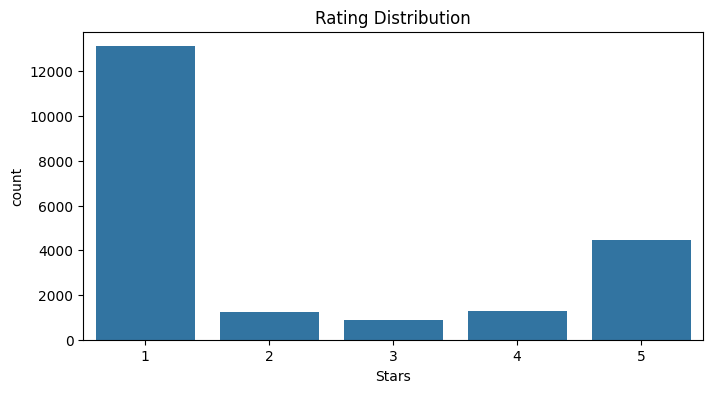

In [ ]:
# Check if the numeric rating column exists before plotting
if 'rating_num' in df.columns:

    # Create a new figure with a specified size
    plt.figure(figsize=(8, 4))

    # Sort unique rating values to ensure stars appear in ascending order
    order = sorted(df['rating_num'].dropna().unique())

    # Plot the count of each star rating
    sns.countplot(x='rating_num', data=df, order=order)

    # Add title and axis labels for clarity
    plt.title('Rating Distribution')
    plt.xlabel('Stars')

    # Display the plot
    plt.show()


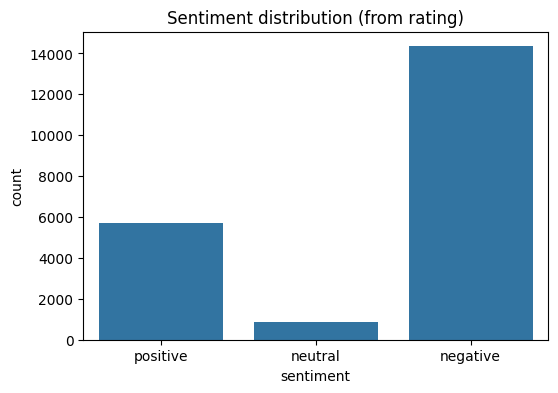

In [ ]:
# Create a figure to visualise sentiment class frequencies
plt.figure(figsize=(6, 4))

# Plot the count of each sentiment class
# The order is fixed to ensure consistent comparison across plots
sns.countplot(x='sentiment', data=df, order=['positive', 'neutral', 'negative'])

# Add a descriptive title
plt.title('Sentiment Distribution (Derived from Ratings)')

# Display the plot
plt.show()


/tmp/ipython-input-897471774.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time = df.groupby(pd.Grouper(key=date_col, freq='M')).size().reset_index(name='Review Count')


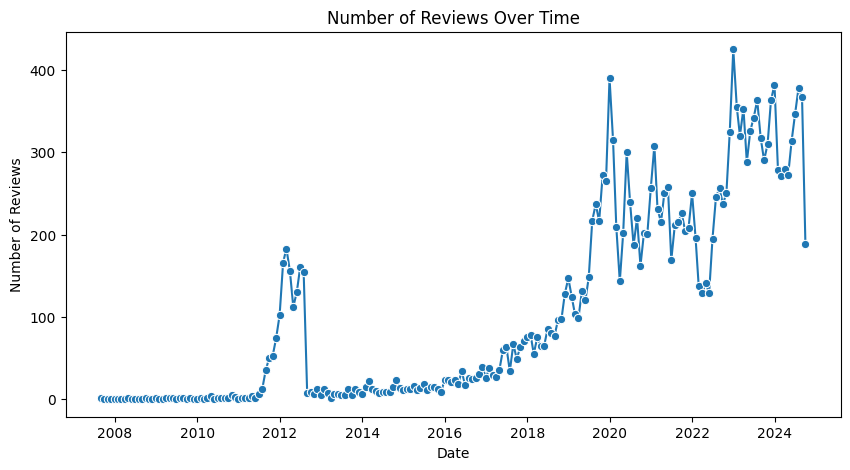

In [ ]:

# Identify which parsed date column is available in the dataset
# This allows flexibility if only one of the date columns exists
date_col = None
for c in ['Date of Experience_dt', 'Review Date_dt']:
    if c in df.columns:
        date_col = c
        break

# Proceed only if a valid date column is found
if date_col:

    # Aggregate the number of reviews on a monthly basis
    df_time = (
        df
        .groupby(pd.Grouper(key=date_col, freq='M'))
        .size()
        .reset_index(name='Review Count')
    )

    # Plot the temporal trend of review volume
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=date_col, y='Review Count', data=df_time, marker='o')

    # Add labels and title for clarity
    plt.title('Number of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')

    # Display the plot
    plt.show()


/tmp/ipython-input-3913115978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_num', y='Country', data=df[df['Country'].isin(top_countries)],


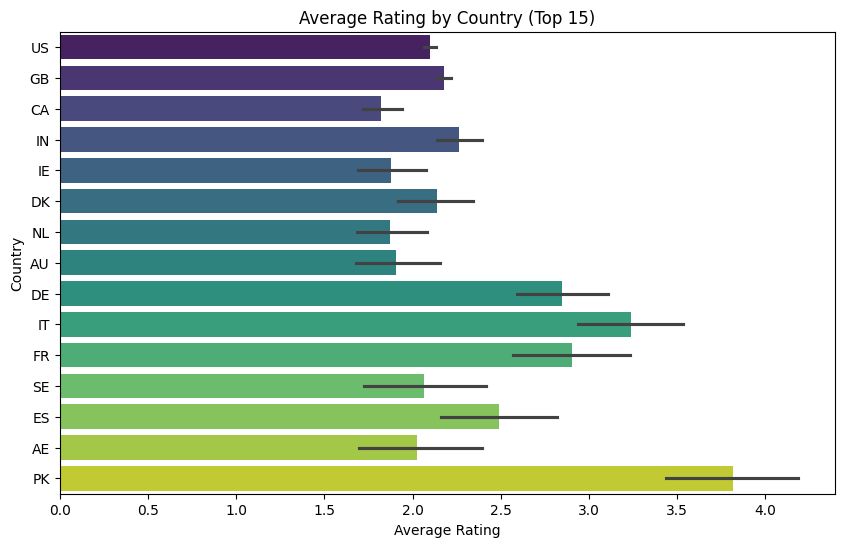

In [ ]:

# Proceed only if both Country and rating columns exist
if 'Country' in df.columns and 'rating_num' in df.columns:

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Identify the top 15 countries by number of reviews
    # This avoids noisy averages from countries with very few reviews
    top_countries = df['Country'].value_counts().head(15).index

    # Plot the average rating for each of the top 15 countries
    sns.barplot(
        x='rating_num',
        y='Country',
        data=df[df['Country'].isin(top_countries)],
        estimator=np.mean,          # Compute mean rating per country
        order=top_countries,
        palette='viridis'
    )

    # Add plot title and axis labels
    plt.title('Average Rating by Country (Top 15)')
    plt.xlabel('Average Rating')
    plt.ylabel('Country')

    # Display the plot
    plt.show()


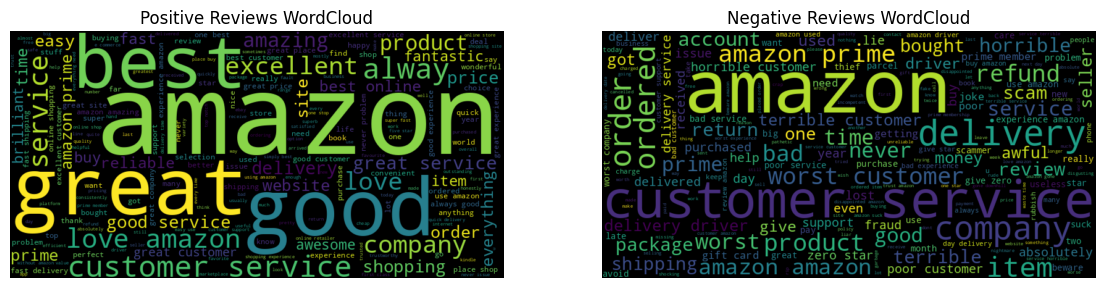

In [ ]:
# Word Clouds
try:
    # Import WordCloud library for visualising frequent words
    from wordcloud import WordCloud

    # Combine all cleaned positive review texts into a single string
    # Ratings ≥ 4 are treated as positive sentiment
    pos_text = ' '.join(
        df[df['rating_num'] >= 4][clean_col].astype(str).tolist()
    )

    # Combine all cleaned negative review texts into a single string
    # Ratings ≤ 2 are treated as negative sentiment
    neg_text = ' '.join(
        df[df['rating_num'] <= 2][clean_col].astype(str).tolist()
    )

    # Create a figure with two subplots
    plt.figure(figsize=(14, 6))

    # ---- Positive reviews word cloud ----
    plt.subplot(1, 2, 1)
    wc1 = WordCloud(width=800, height=400).generate(
        pos_text if len(pos_text) > 0 else "positive"
    )
    plt.imshow(wc1, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Reviews WordCloud')

    # ---- Negative reviews word cloud ----
    plt.subplot(1, 2, 2)
    wc2 = WordCloud(width=800, height=400).generate(
        neg_text if len(neg_text) > 0 else "negative"
    )
    plt.imshow(wc2, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Reviews WordCloud')

    # Display the word clouds
    plt.show()

except Exception as e:
    # Handle cases where WordCloud is not installed or text is unavailable
    print("WordCloud generation failed:", e)


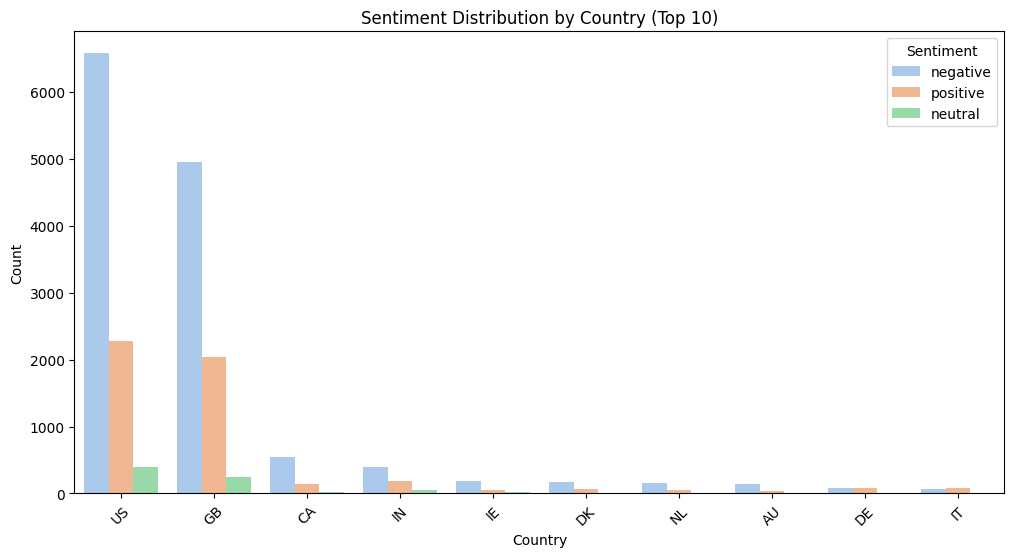

In [ ]:

# Sentiment by Country


# Proceed only if both Country and sentiment columns exist
if 'Country' in df.columns and 'sentiment' in df.columns:

    # Create a figure for visualisation
    plt.figure(figsize=(12, 6))

    # Select the top 10 countries by number of reviews
    # This avoids unreliable comparisons for countries with very few samples
    top_countries = df['Country'].value_counts().head(10).index

    # Plot sentiment distribution for each of the top countries
    sns.countplot(
        data=df[df['Country'].isin(top_countries)],
        x='Country',
        hue='sentiment',
        order=top_countries,
        palette='pastel'
    )

    # Add title and axis labels
    plt.title('Sentiment Distribution by Country (Top 10)')
    plt.xlabel('Country')
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add legend to distinguish sentiment classes
    plt.legend(title='Sentiment')

    # Display the plot
    plt.show()


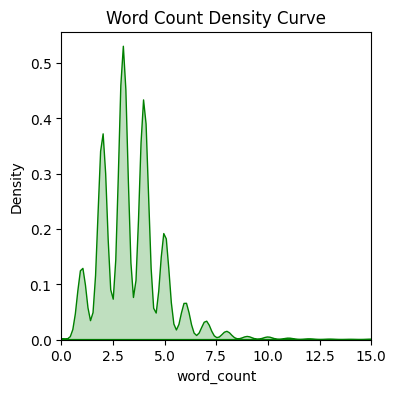

In [ ]:
# Exploratory Data Analysis: Word Count Distribution


# Create a figure for the density plot
plt.figure(figsize=(4, 4))

# Plot a Kernel Density Estimate (KDE) of word counts
# KDE provides a smooth estimate of the distribution of review lengths
sns.kdeplot(
    df['word_count'],
    fill=True,
    bw_adjust=1,
    color="green"
)

# Limit the x-axis to focus on short reviews
# This avoids distortion caused by very long outliers
plt.xlim(0, 15)

# Add a title for clarity
plt.title("Word Count Density Curve")

# Display the plot
plt.show()


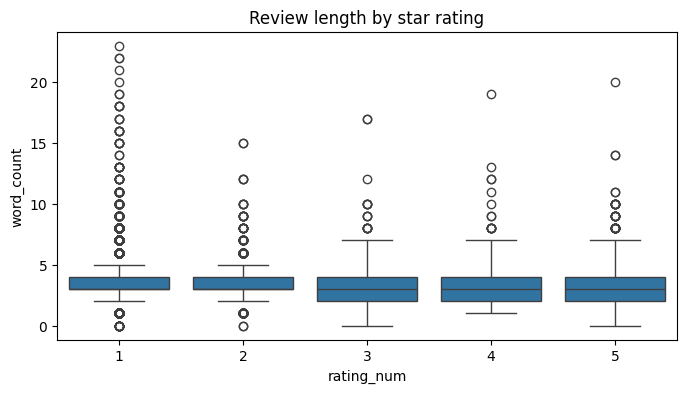

In [ ]:
# Review Length vs Rating

# Proceed only if the rating column exists
if 'rating_num' in df.columns:

    # Create a figure for the boxplot
    plt.figure(figsize=(8, 4))

    # Plot review length (word count) grouped by star rating
    # Boxplots show the median, spread, and outliers for each rating category
    sns.boxplot(x='rating_num', y='word_count', data=df)

    # Add title for clarity
    plt.title('Review Length by Star Rating')

    # Display the plot
    plt.show()


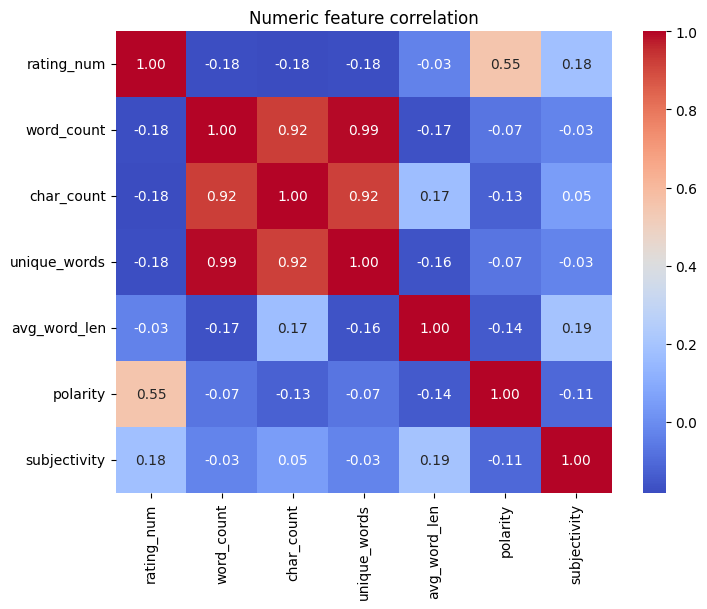

In [ ]:
# Correlation Matrix
# Select numeric features relevant for analysis
# Only include columns that actually exist in the dataset
num_cols = [
    c for c in [
        'rating_num',
        'word_count',
        'char_count',
        'unique_words',
        'avg_word_len',
        'polarity',
        'subjectivity'
    ] if c in df.columns
]

# Proceed only if numeric columns are available
if num_cols:

    # Create a figure for the correlation heatmap
    plt.figure(figsize=(8, 6))

    # Plot correlation matrix with annotations
    # Pearson correlation is used by default
    sns.heatmap(
        df[num_cols].corr(),
        annot=True,
        cmap='coolwarm',
        fmt=".2f"
    )

    # Add title for clarity
    plt.title('Numeric Feature Correlation')

    # Display the heatmap
    plt.show()


In [ ]:
# Checking class imbalance
df['sentiment'].value_counts()

,count
sentiment,
negative,14345
positive,5718
neutral,874


In [ ]:
df['sentiment'].value_counts(normalize=True) * 100


,proportion
sentiment,
negative,68.515069
positive,27.310503
neutral,4.174428


/tmp/ipython-input-3767415134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


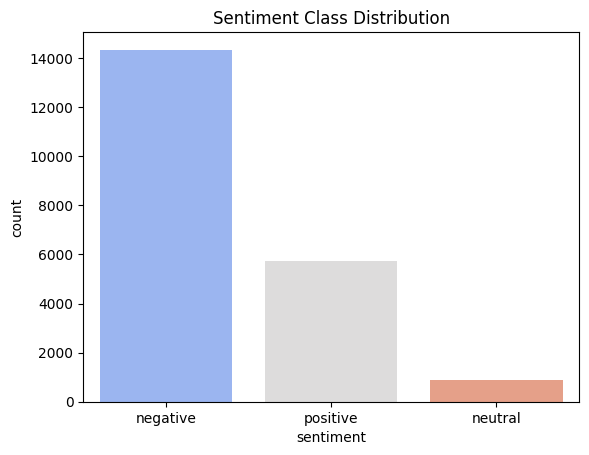

In [ ]:
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Class Distribution")
plt.show()

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Convert text data into numerical features using TF-IDF
# (required for ML models )
from sklearn.feature_extraction.text import TfidfVectorizer

# Logistic Regression classifier (baseline linear model for text classification)
from sklearn.linear_model import LogisticRegression

# Evaluation metrics for classification performance
from sklearn.metrics import (
    classification_report,      # Precision, recall, F1-score per class
    confusion_matrix,           # Confusion matrix values
    accuracy_score,             # Overall accuracy
    f1_score,                   # F1-score (macro/weighted options)
    ConfusionMatrixDisplay      # Built-in confusion matrix visualisation
)

# Handle class imbalance using oversampling (increases minority class samples)
from imblearn.over_sampling import RandomOverSampler

# Plotting library for figures (e.g., confusion matrix, learning curves)
import matplotlib.pyplot as plt

# Numerical operations (e.g., extracting feature names, array-based operations)
import numpy as np


In [ ]:
# 1) Prepare Data for Modelling

# Remove rows with missing cleaned review text or sentiment labels
# These rows cannot be used for supervised learning
df_ml = df.dropna(subset=['Review Text_clean', 'sentiment'])

# Define input features (X): cleaned review text
# Convert to string to ensure consistent text processing
X = df_ml['Review Text_clean'].astype(str)

# Define target variable (y): sentiment labels
y = df_ml['sentiment']

# Display the class distribution before handling imbalance
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
sentiment
negative    14345
positive     5718
neutral       874
Name: count, dtype: int64


In [ ]:

# 2) Train–Test Split

# Split the dataset into training (80%) and testing (20%) sets
# Stratification ensures the class distribution is preserved in both sets
# A fixed random_state guarantees reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# 3) TF-IDF Vectorisation

# Initialise the TF-IDF vectoriser
# max_features=20000 limits vocabulary size to reduce sparsity
# ngram_range=(1,2) includes unigrams and bigrams
# stop_words='english' removes common non-informative words
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit the vectoriser on training data and transform it
# Fitting only on training data prevents information leakage
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data using the learned vocabulary
X_test_tfidf = tfidf.transform(X_test)


In [ ]:

# 4) Handle Class Imbalance


# Initialise RandomOverSampler to balance minority classes
# Oversampling duplicates samples from under-represented classes
# random_state ensures reproducibility
ros = RandomOverSampler(random_state=42)

# Apply oversampling ONLY to the training data
# This prevents data leakage into the test set
X_train_bal, y_train_bal = ros.fit_resample(X_train_tfidf, y_train)

# Display class distribution after balancing
print("Class distribution after balancing:")
print(y_train_bal.value_counts())


Class distribution after balancing:
sentiment
negative    11476
positive    11476
neutral     11476
Name: count, dtype: int64


In [ ]:
# ============================================
# 5) Train Logistic Regression Model
# ============================================

# Initialise the Logistic Regression classifier
# max_iter=1000 ensures convergence for high-dimensional TF-IDF features
# lbfgs is an efficient solver for multiclass classification
lr = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

# Train the model using the balanced training dataset
lr.fit(X_train_bal, y_train_bal)


LogisticRegression(max_iter=1000)

In [ ]:
# --- 6. Evaluation ---
y_pred = lr.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))



Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.92      0.93      2869
     neutral       0.13      0.23      0.17       175
    positive       0.85      0.80      0.83      1144

    accuracy                           0.86      4188
   macro avg       0.64      0.65      0.64      4188
weighted avg       0.88      0.86      0.87      4188

Accuracy: 0.8576886341929322
Weighted F1-score: 0.8685886105434277


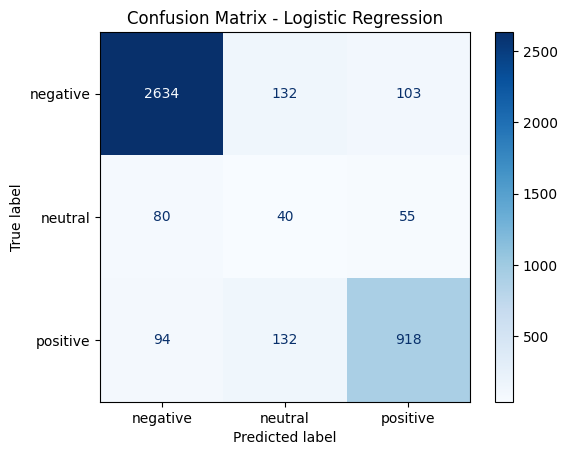

In [ ]:
# --- 7. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:

# 8) Feature Importance: Top Influential Words


# Retrieve feature (word/ngram) names from the TF-IDF vectoriser
feature_names = np.array(tfidf.get_feature_names_out())

# Extract the learned coefficients from the Logistic Regression model
# Shape: (number_of_classes, number_of_features)
coefficients = lr.coef_

# Iterate over each sentiment class
for idx, label in enumerate(lr.classes_):

    # Identify indices of the top 10 words with the highest positive coefficients
    # These words contribute most strongly to predicting this class
    top10 = np.argsort(coefficients[idx])[-10:]

    # Identify indices of the top 10 words with the most negative coefficients
    # These words reduce the likelihood of predicting this class
    bottom10 = np.argsort(coefficients[idx])[:10]

    # Print the most influential words for the current class
    print(f"\nTop positive words for {label}: {feature_names[top10]}")
    print(f"Top negative words for {label}: {feature_names[bottom10]}")


Top positive words for negative: ['told' 'cancel' 'money' 'disgusting' 'worse' 'joke' 'poor' 'horrible'
 'account' 'worst']
Top negative words for negative: ['great' 'love' 'good' 'best' 'thank' 'amazon amazon' 'excellent' 'fast'
 'problem' 'easy']

Top positive words for neutral: ['terrible' 'feeling' 'good easy' 'end' 'letting' 'slow' 'kind' 'thank'
 'okay' 'amazon amazon']
Top negative words for neutral: ['return' 'refund' 'recommend' 'product amazon' 'quickly' 'use amazon'
 'live' 'called' 'asked' 'impressed']

Top positive words for positive: ['perfect' 'awesome' 'easy' 'excellent' 'amazing' 'fast' 'best' 'quickly'
 'love' 'great']
Top negative words for positive: ['terrible' 'account' 'money' 'letting' 'worst' 'longer' 'delayed'
 'horrible' 'lot better' 'good easy']


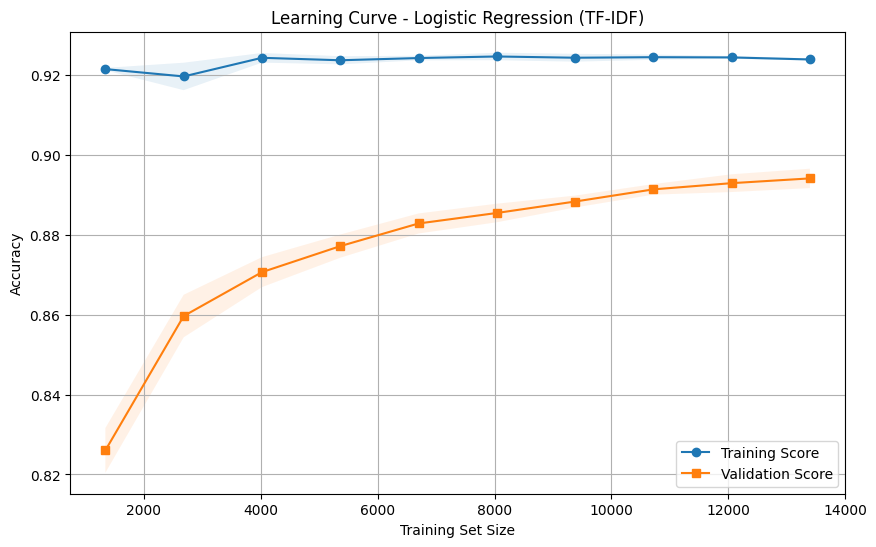

In [ ]:
# ============================================
# Learning Curve for Logistic Regression
# ============================================

# Import learning curve utility
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Initialise Logistic Regression model
# Same configuration as used in the main experiment
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Generate learning curve data
# X_train_tfidf and y_train are used (before oversampling)
# This ensures learning behaviour reflects the original data distribution
train_sizes, train_scores, val_scores = learning_curve(
    lr_model,
    X_train_tfidf,                  # Training feature matrix
    y_train,                        # Training labels
    cv=5,                           # 5-fold cross-validation
    scoring='accuracy',             # Accuracy as evaluation metric
    n_jobs=-1,                      # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10)  # Incrementally increase training size
)

# Compute mean training and validation accuracy across folds
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))

# Training accuracy curve
plt.plot(
    train_sizes,
    train_scores_mean,
    label="Training Score",
    marker='o'
)

# Validation accuracy curve
plt.plot(
    train_sizes,
    val_scores_mean,
    label="Validation Score",
    marker='s'
)

# Add shaded region representing standard deviation (training)
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores.std(axis=1),
    train_scores_mean + train_scores.std(axis=1),
    alpha=0.1
)

# Add shaded region representing standard deviation (validation)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores.std(axis=1),
    val_scores_mean + val_scores.std(axis=1),
    alpha=0.1
)

# Add labels, title, legend, and grid
plt.title("Learning Curve - Logistic Regression (TF-IDF)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters found: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Tuned Logistic Regression Report:

              precision    recall  f1-score   support

    negative       0.93      0.93      0.93      2869
     neutral       0.12      0.18      0.14       175
    positive       0.86      0.81      0.83      1144

    accuracy                           0.86      4188
   macro avg       0.64      0.64      0.64      4188
weighted avg       0.88      0.86      0.87      4188

Confusion Matrix:
 [[2661  111   97]
 [  88   31   56]
 [  99  119  926]]
Accuracy: 0.8638968481375359


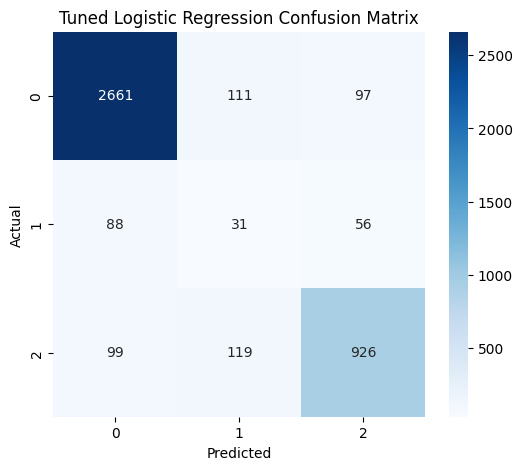

In [ ]:

# Logistic Regression with Hyperparameter Tuning (Grid Search)

from sklearn.model_selection import GridSearchCV

# 1) Initialise Logistic Regression
# - class_weight='balanced' automatically adjusts class weights inversely proportional
#   to class frequencies, helping with class imbalance.
# - max_iter=1000 ensures the solver converges on high-dimensional TF-IDF features.
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# 2) Define the hyperparameter search space (grid)
# - C controls regularisation strength:
#     smaller C => stronger regularisation (simpler model, less overfitting)
#     larger C  => weaker regularisation (more flexible model, risk of overfitting)
# - penalty='l2' applies L2 regularisation (ridge), commonly used for text classification.
# - solver options: 'lbfgs' and 'saga' both support L2; 'saga' is often good for large sparse data.
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

# 3) Set up GridSearchCV
# - cv=5 performs 5-fold cross-validation to estimate generalisation performance.
# - scoring='f1_weighted' is used because the dataset is imbalanced; weighted F1 gives each class contribution proportional to its support.
# - n_jobs=-1 uses all CPU cores for faster execution.
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 4) Fit GridSearchCV on training data
# IMPORTANT: this fits multiple models across folds and selects the best hyperparameters.
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameter combination found during cross-validation
print("\nBest Parameters found:", grid_search.best_params_)

# 5) Evaluate the tuned model on the held-out test set
# - best_estimator_ is the model trained with the best hyperparameters.
best_lr = grid_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test_tfidf)

# Print detailed classification metrics
print("\nTuned Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_tuned))

# Print confusion matrix values (actual vs predicted)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

# Print overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

# 6) Visualise the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


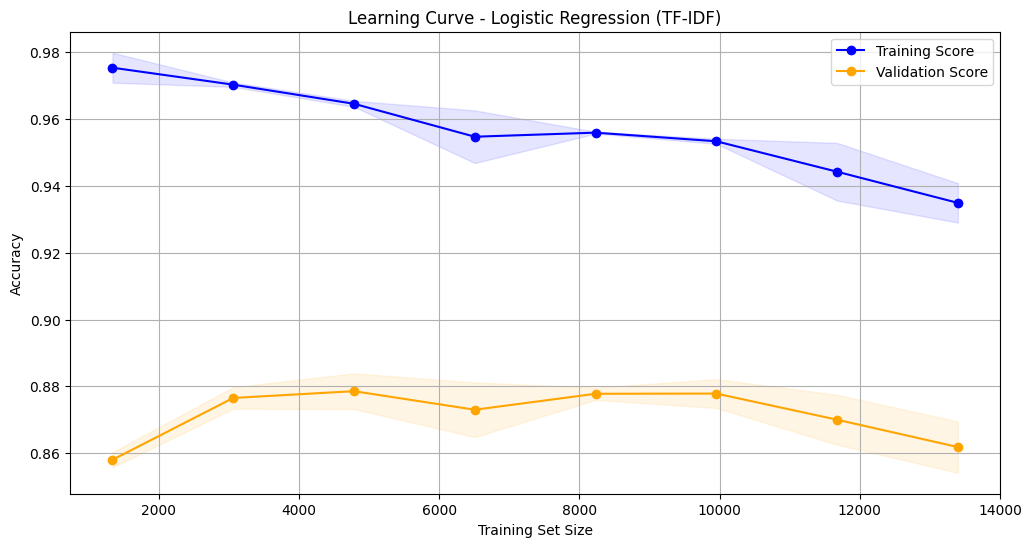

In [ ]:
# Learning Curve - Logistic Regression (with class_weight='balanced')


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# 1) Define the model (same configuration as your tuned/training setup)
# - class_weight='balanced' reduces bias toward majority classes
# - max_iter=1000 helps convergence on sparse TF-IDF features
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# 2) Generate learning curve data
# learning_curve trains the model multiple times using increasing portions of the training data.
# For each training size, it performs 5-fold cross-validation and returns training + validation scores.
train_sizes, train_scores, val_scores = learning_curve(
    estimator=lr_model,
    X=X_train_tfidf,                        # training feature matrix (TF-IDF)
    y=y_train,                              # training labels
    cv=5,                                   # 5-fold cross-validation
    scoring='accuracy',                     # metric used for curves
    train_sizes=np.linspace(0.1, 1.0, 8),   # use 8 points from 10% to 100% of training set
    n_jobs=-1                               # use all CPU cores
)

# 3) Compute mean and standard deviation across folds
# - mean gives the average performance
# - std shows variation across different CV splits
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# 4) Plot the learning curve
plt.figure(figsize=(12, 6))

# Training accuracy curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')

# Validation (CV) accuracy curve
plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Validation Score')

# 5) Add shaded confidence bands (± 1 standard deviation)
# This visualises how stable the scores are across folds
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean   - val_std,   val_mean   + val_std,   alpha=0.1, color='orange')

# 6) Add plot labels and formatting
plt.title("Learning Curve - Logistic Regression (TF-IDF)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# 7) Display the plot
plt.show()


In [ ]:

# Random Forest for Sentiment Analysis


# Random Forest classifier (ensemble model based on multiple decision trees)
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics for classification performance
from sklearn.metrics import (
    classification_report,      # Precision, recall, and F1-score per class
    confusion_matrix,           # Confusion matrix values
    accuracy_score,             # Overall accuracy
    f1_score,                   # F1-score (macro/weighted options)
    ConfusionMatrixDisplay      # Confusion matrix visualisation
)

# Handle class imbalance by oversampling minority classes
from imblearn.over_sampling import RandomOverSampler

# Plotting library for visualisations (confusion matrix, feature importance plots, etc.)
import matplotlib.pyplot as plt

# Numerical operations (sorting importances, handling feature arrays, etc.)
import numpy as np


In [ ]:
# --- 1. Prepare data ---
df_ml = df.dropna(subset=['Review Text_clean', 'sentiment'])
X = df_ml['Review Text_clean'].astype(str)
y = df_ml['sentiment']

print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
sentiment
negative    14345
positive     5718
neutral       874
Name: count, dtype: int64


In [ ]:
# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [ ]:
# ----------------------------------
# TF-IDF Vectorization
# ----------------------------------

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=20000,      # Limit vocabulary size to top 20,000 terms
    ngram_range=(1, 2),      # Use unigrams and bigrams to capture short phrases
    stop_words='english'     # Remove common English stopwords
)

# Fit TF-IDF on training text and transform it into numerical features
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test text using the same fitted TF-IDF model
# (Important to avoid data leakage)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
# Handle Class Imbalance using Random Oversampling


# Initialize RandomOverSampler
# This technique randomly duplicates samples from minority classes
# to balance the class distribution in the training data
ros = RandomOverSampler(random_state=42)

# Apply oversampling ONLY on the training set
# This prevents data leakage into the test set
X_train_bal, y_train_bal = ros.fit_resample(X_train_tfidf, y_train)

# Display class distribution after balancing
print("Class distribution after balancing:")
print(y_train_bal.value_counts())


Class distribution after balancing:
sentiment
negative    11476
positive    11476
neutral     11476
Name: count, dtype: int64


In [ ]:
# Random Forest Model Training

# Initialize Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=200,      # Number of decision trees in the forest
    max_depth=None,        # Allow trees to grow fully (no depth restriction)
    random_state=42,       # Ensures reproducibility
    n_jobs=-1              # Use all available CPU cores for faster training
)

# Train the Random Forest model on the balanced training data
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# --- 6. Evaluation ---
y_pred = rf.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.94      0.92      2869
     neutral       0.10      0.08      0.09       175
    positive       0.82      0.76      0.79      1144

    accuracy                           0.85      4188
   macro avg       0.61      0.59      0.60      4188
weighted avg       0.85      0.85      0.85      4188

Accuracy: 0.8538681948424068
Weighted F1-score: 0.8496306508961159


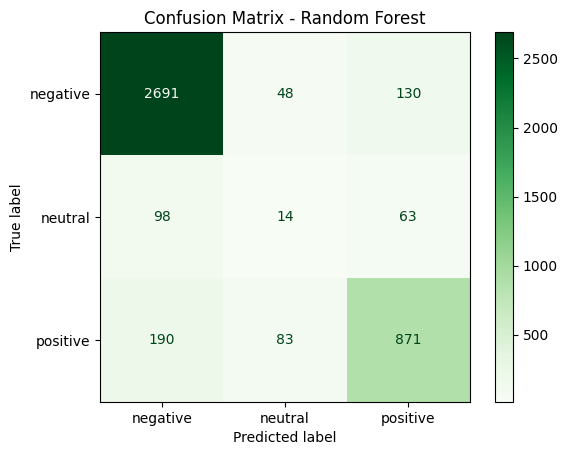

In [ ]:
# --- 7. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

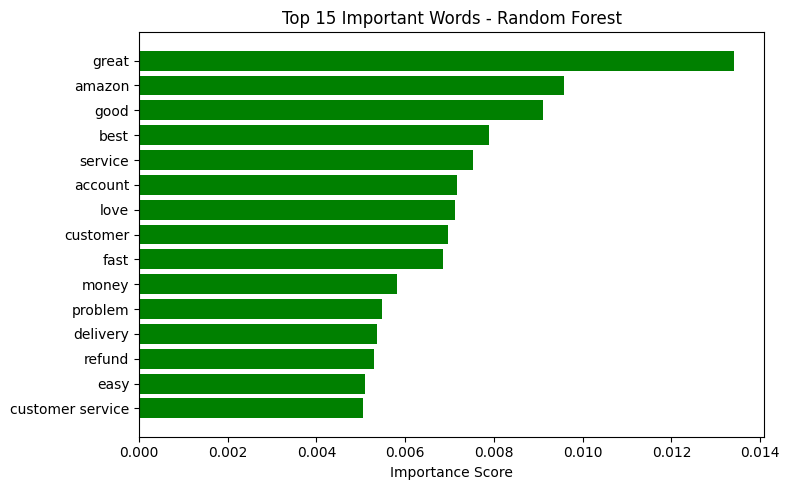

In [ ]:
# --- 8. Feature Importance (Top Words) ---
feature_names = np.array(tfidf.get_feature_names_out())
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], color='green')
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 15 Important Words - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

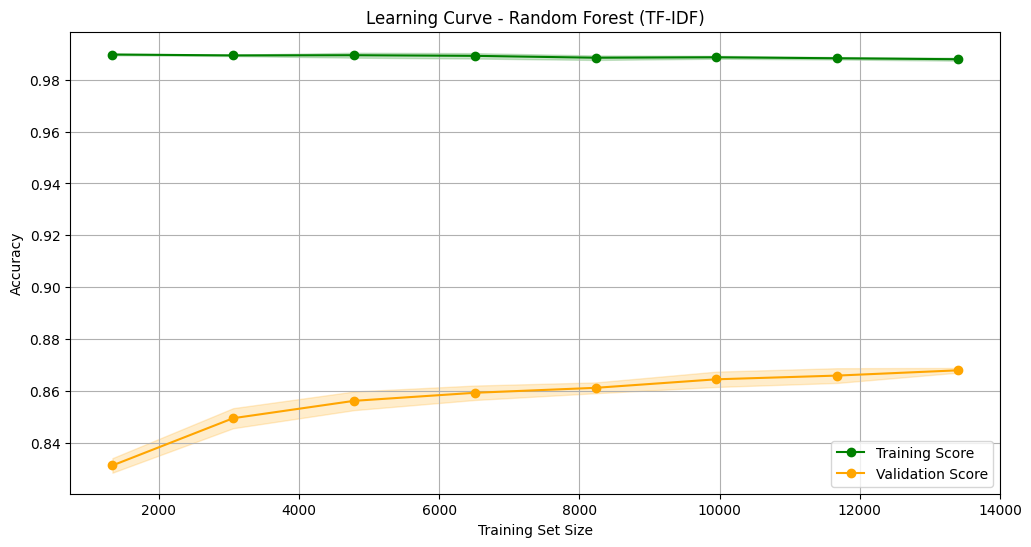

In [ ]:

# Learning Curve - Random Forest (TF-IDF)


from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Reuse the SAME Random Forest configuration used in model training
# This ensures consistency between training and diagnostic evaluation
rf_model = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=None,        # Fully grown trees
    random_state=42,       # Reproducibility
    n_jobs=-1              # Parallel processing
)

# Generate learning curve data
# The model is trained on increasing fractions of the training set
# and evaluated using 5-fold cross-validation
train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf_model,
    X=X_train_tfidf,        # TF-IDF features
    y=y_train,              # Original (unbalanced) labels
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # Accuracy metric
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

# Compute mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Compute mean and standard deviation of validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', color='orange', label="Validation Accuracy")

# Confidence intervals
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 alpha=0.2, color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                 alpha=0.2, color='orange')

plt.title("Learning Curve - Random Forest (TF-IDF)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 234}

Tuned Random Forest Report (Randomized Search):

              precision    recall  f1-score   support

    negative       0.89      0.94      0.92      2869
     neutral       0.08      0.06      0.07       175
    positive       0.82      0.74      0.78      1144

    accuracy                           0.85      4188
   macro avg       0.60      0.58      0.59      4188
weighted avg       0.84      0.85      0.84      4188

Accuracy: 0.8496
F1 (Macro): 0.5862
F1 (Weighted): 0.8430


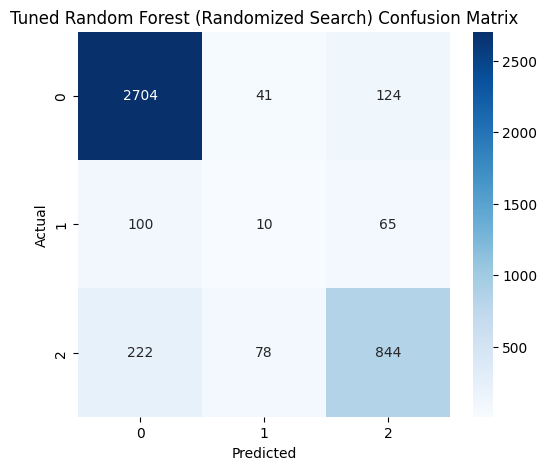

In [ ]:
# Random Forest with Hyperparameter Tuning (Randomized Search)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Define parameter distributions (search space)
# RandomizedSearchCV samples random combinations from these distributions.
# This is usually faster than GridSearchCV for larger search spaces.
param_dist = {
    'n_estimators': randint(100, 500),         # number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],       # maximum depth of each tree
    'min_samples_split': randint(2, 10),       # min samples needed to split an internal node
    'min_samples_leaf': randint(1, 4),         # min samples required at a leaf node (regularises trees)
    'max_features': ['sqrt', 'log2']           # number of features considered at each split
}

# 2) Initialise the base Random Forest model
# - class_weight='balanced' adjusts weights inversely proportional to class frequencies.
# - n_jobs=-1 enables parallel training across CPU cores.
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# 3) Configure RandomizedSearchCV
# - n_iter=20 tries 20 randomly sampled hyperparameter combinations.
# - scoring='f1_weighted' is chosen due to class imbalance (better than accuracy alone).
# - cv=3 performs 3-fold cross-validation per combination.
#   Total fits = n_iter * cv = 20 * 3 = 60 model fits (can be slow).
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4) Fit the hyperparameter tuning process on the training data
# This will train multiple Random Forest models and select the best configuration.
rf_random.fit(X_train_tfidf, y_train)

# 5) Display the best hyperparameters found during cross-validation
print("\nBest Parameters found:", rf_random.best_params_)

# 6) Evaluate the tuned best model on the held-out test set
best_rf = rf_random.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_tfidf)

print("\nTuned Random Forest Report (Randomized Search):\n")
print(classification_report(y_test, y_pred_rf_tuned))

# 7) Compute and print key summary metrics
# - Macro F1 treats each class equally (good for minority-class performance)
# - Weighted F1 accounts for class support (good overall score under imbalance)
acc = accuracy_score(y_test, y_pred_rf_tuned)
f1_macro = f1_score(y_test, y_pred_rf_tuned, average='macro')
f1_weighted = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1 (Macro): {f1_macro:.4f}")
print(f"F1 (Weighted): {f1_weighted:.4f}")

# 8) Plot confusion matrix
# This provides a class-wise view of misclassifications.
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest (Randomized Search) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


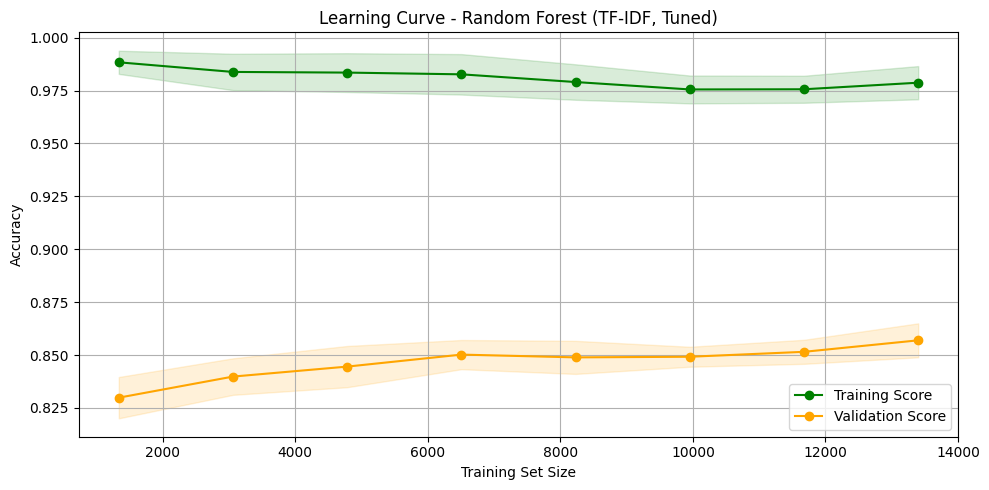

In [ ]:
# ===========================================
# Learning Curve for Tuned Random Forest
# ===========================================

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Use the best estimator obtained from RandomizedSearchCV
# This ensures the learning curve reflects the tuned model
# best_rf = rf_random.best_estimator_

# 1) Define training set sizes
# The model is trained on increasing portions of the training data
train_sizes = np.linspace(0.1, 1.0, 8)

# 2) Compute learning curve
# - 5-fold cross-validation is used
# - Accuracy is used for interpretability (can also use f1_weighted)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_rf,
    X=X_train_tfidf,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# 3) Compute mean and standard deviation across folds
train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

# 4) Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', color='green')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy', color='orange')

# Confidence intervals
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.15, color='green')

plt.fill_between(train_sizes,
                 val_mean - val_std,
                 val_mean + val_std,
                 alpha=0.15, color='orange')

plt.title('Learning Curve - Random Forest (TF-IDF, Tuned)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# =====================================
# DistilBERT for Sentiment Analysis
# =====================================

# Install required libraries (run once in a fresh environment)
# - transformers: Hugging Face library for pretrained transformer models
# - torch: PyTorch backend for deep learning
# - scikit-learn: train/test split + evaluation metrics
# - imbalanced-learn:(imbalance handling for classical ML; not always needed for transformers)
!pip install transformers torch scikit-learn imbalanced-learn -q

# PyTorch imports (used for datasets, tensors, and training backend)
import torch
from torch.utils.data import Dataset, DataLoader

# Hugging Face Transformers imports
# - Tokenizer: converts text into token IDs for the model
# - Model: pretrained DistilBERT adapted for classification tasks
# - Trainer/TrainingArguments: high-level training API for fine-tuning
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)

# Scikit-learn utilities for data splitting and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Compute class weights for handling class imbalance during training
# (useful when neutral class has fewer samples)
from sklearn.utils.class_weight import compute_class_weight

# General-purpose libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 1. Prepare data for DistilBERT


# Remove rows with missing cleaned review text or sentiment labels
df_dl = df.dropna(subset=['Review Text_clean', 'sentiment']).copy()

# Keep only the three target sentiment classes
df_dl = df_dl[df_dl['sentiment'].isin(['positive', 'negative', 'neutral'])]

# Map sentiment labels to numeric IDs (required for transformer models)
label2id = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

# Reverse mapping (useful for decoding predictions later)
id2label = {v: k for k, v in label2id.items()}

# Create a numeric label column
df_dl['label'] = df_dl['sentiment'].map(label2id)

# Split the dataset into training and testing sets
# - Stratification preserves the original class distribution
# - 80% training, 20% testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_dl['Review Text_clean'].tolist(),
    df_dl['label'].tolist(),
    stratify=df_dl['label'],
    test_size=0.2,
    random_state=42
)


In [ ]:
# 2. Tokenization for DistilBERT


# Load the pretrained DistilBERT tokenizer
# 'distilbert-base-uncased' uses lowercase text and a WordPiece vocabulary
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize training texts
# - truncation=True: cuts sequences longer than max_length
# - padding=True: pads shorter sequences to the same length
# - max_length=256: balances context coverage and computational cost
train_encodings = tokenizer(
    train_texts,
    truncation=True,
    padding=True,
    max_length=256
)

# Tokenize test texts using the same tokenizer and settings
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=256
)


In [ ]:
# 3. Custom Dataset Class for DistilBERT


# Create a custom PyTorch Dataset class
# This allows the Hugging Face Trainer to efficiently load data in batches
class ReviewDataset(Dataset):

    def __init__(self, encodings, labels):
        # Store tokenized inputs (input_ids, attention_mask)
        self.encodings = encodings
        # Store numeric sentiment labels
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieve a single sample by index
        # Convert tokenized inputs to PyTorch tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

        # Add the label tensor (required for supervised learning)
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        # Return total number of samples
        return len(self.labels)

# Instantiate training and testing datasets
train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)


In [ ]:

# 4. Compute Class Weights for Imbalanced Data


# Compute class weights using the training labels
# This assigns higher weights to minority classes (e.g. neutral reviews)
# and lower weights to majority classes (e.g. negative reviews)
class_weights = compute_class_weight(
    class_weight='balanced',        # Automatically balance using inverse class frequency
    classes=np.unique(train_labels),
    y=train_labels
)

# Convert class weights to a PyTorch tensor
# Required for use in a weighted loss function during training
class_weights = torch.tensor(class_weights, dtype=torch.float)


In [ ]:

# 5. Load DistilBERT Model for Classification


# Load the pretrained DistilBERT model and adapt it for sentiment classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",  # Pretrained base DistilBERT model
    num_labels=3,               # Three sentiment classes: negative, neutral, positive
    dropout=0.3,                # Increased dropout to reduce overfitting
    attention_dropout=0.3       # Increased attention dropout for regularisation
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.3, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.3, inplace=False)


In [ ]:
pip install -U "transformers[torch]" datasets -q

In [ ]:

# 6. Training Arguments (DistilBERT Fine-tuning Configuration)

training_args = TrainingArguments(
    output_dir='./results',              # Directory to save model outputs/checkpoints/logs

    num_train_epochs=5,                  # Number of full passes over the training dataset
    per_device_train_batch_size=8,       # Batch size per GPU/CPU for training
    per_device_eval_batch_size=16,       # Batch size per GPU/CPU for evaluation (can be larger)

    eval_strategy="epoch",               # Evaluate the model at the end of each epoch
    save_strategy="no",                  # Do not save checkpoints (keeps runtime/storage minimal)

    logging_dir='./logs',                # Directory to store training logs
    learning_rate=2e-5,                  # Standard fine-tuning learning rate for transformers
    weight_decay=0.01,                   # L2 regularisation to reduce overfitting

    report_to="none"                     # Disables W&B/other logging integrations
)


In [ ]:

# 7. Trainer Setup

from torch.nn import CrossEntropyLoss

# Initialise Hugging Face Trainer
# - model: fine-tuned DistilBERT model
# - args: training configuration (epochs, batch size, learning rate, etc.)
# - train_dataset: tokenized training data
# - eval_dataset: tokenized validation/test data
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)


# 8. Train Model

from accelerate import Accelerator

# Manually create an Accelerator instance
accelerator = Accelerator()

# Forcefully reassign the Trainer's internal accelerator
trainer.accelerator = accelerator

# Start model training
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.368200,0.365167
2,0.304000,0.388199
3,0.266300,0.374838
4,0.271700,0.417427
5,0.253300,0.419317


TrainOutput(global_step=10470, training_loss=0.30537230337702215, metrics={'train_runtime': 1960.2786, 'train_samples_per_second': 42.721, 'train_steps_per_second': 5.341, 'total_flos': 5546840068477440.0, 'train_loss': 0.30537230337702215, 'epoch': 5.0})

**Evaluation**

In [ ]:
# --- 9. Evaluate ---
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = test_labels

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(label2id.keys())))

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Weighted F1-score:", f1_score(y_true, y_pred, average='weighted'))


Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2869
     neutral       0.34      0.13      0.18       175
    positive       0.85      0.91      0.88      1144

    accuracy                           0.90      4188
   macro avg       0.71      0.66      0.67      4188
weighted avg       0.89      0.90      0.90      4188

Accuracy: 0.9044890162368673
Weighted F1-score: 0.8951334151521977


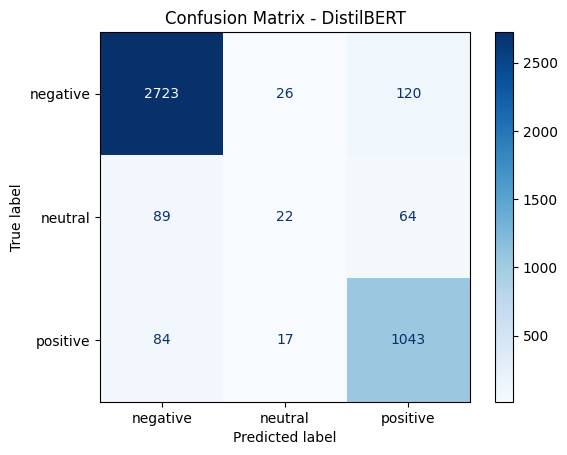

In [ ]:
# --- 10. Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label2id.keys()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - DistilBERT")
plt.show()